<a href="https://colab.research.google.com/github/Juyoung4/Tesseract_OCR/blob/main/pyTesseract_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
# 제일 먼저 tesseract 설치한다
!sudo apt install tesseract-ocr
!pip install pytesseract 
!pip install opencv-python
!pip install imutils
!pip install numpy
!pip install pillow
!pip install nltk
!pip install tensorflow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [63]:
# 필요한 모듈 
import os
from IPython.display import Image
import cv2
import pytesseract
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import text_to_word_sequence
%matplotlib inline

In [21]:
path_dir = '/content/drive/My Drive/TEST_OCR1/'
file_list = os.listdir(path_dir)
file_list = [path_dir+i for i in file_list if 'test' in i]
file_list

['/content/drive/My Drive/TEST_OCR1/test3.png',
 '/content/drive/My Drive/TEST_OCR1/test4.jpg',
 '/content/drive/My Drive/TEST_OCR1/test5.jpg',
 '/content/drive/My Drive/TEST_OCR1/test6.png',
 '/content/drive/My Drive/TEST_OCR1/test6.jpg',
 '/content/drive/My Drive/TEST_OCR1/test8.png',
 '/content/drive/My Drive/TEST_OCR1/test9.png',
 '/content/drive/My Drive/TEST_OCR1/test10.png',
 '/content/drive/My Drive/TEST_OCR1/test11.png',
 '/content/drive/My Drive/TEST_OCR1/test12.png',
 '/content/drive/My Drive/TEST_OCR1/test13.png',
 '/content/drive/My Drive/TEST_OCR1/test14.png',
 '/content/drive/My Drive/TEST_OCR1/test2.jpg',
 '/content/drive/My Drive/TEST_OCR1/test7.png',
 '/content/drive/My Drive/TEST_OCR1/test1.png']

In [ ]:
config = r'--oem 3 --psm 3 -c preserve_interword_spaces=1'
for i in file_list:
  print(i)
  try:
    img = mpimg.imread(i)
    plt.imshow(img)
    plt.show()
  except: print("this is error image")
  print(pytesseract.image_to_string(i, lang='eng', config=config),end = "\n")

In [ ]:

for i in file_list:
  image = cv2.imread(i)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  print(i)
  try:
    plt.imshow(gray)
    plt.show()
  except: print("this is error image")
  print(pytesseract.image_to_string(gray, lang='eng', config=config),end = "\n")

## 최종 결론
결과: 옵션 ['--oem 3 --psm 3 -c preserve_interword_spaces=1']이 가장 정확 => 최종

gray scale보다는 오리지널이 더 정확하게 읽음
 - 사실 gray scale은 캡쳐 사진에서 좀 더 좋은 성능을 보임
 - 하지만 일반 학생들은 문제집을 찍어서 사용하기 때문에 오리지널 채택하는것이 좋음


In [55]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [75]:
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [96]:
class OCR():
  def __init__(self, img):
    self.config = r'--oem 3 --psm 3 -c preserve_interword_spaces=1'
    self.image = img # image file path
    self.result = ''

  def image_preprocess(self):
    try:
      img = mpimg.imread(self.image)
      plt.imshow(img)
      plt.show()
    except: print("this is error image")
    self.result = pytesseract.image_to_string(self.image, lang='eng', config=self.config)
    print(self.result)
    self.text_preprocess()

  def text_preprocess(self):
    self.result = text_to_word_sequence(self.result)[:-1] if text_to_word_sequence(self.result)[0] != '\x0c' else []

    if len(self.result) == 0: 
      print("This is invaild photo\n")
      return 0
    elif len(self.result) <= 2:
      print("It's too short text\n")
      return 1
    else:
      print("result text: ", self.result,end="\n")
      return 2
    #print(pos_tag(text_to_word_sequence(self.result))) -> 품사 태깅 사용할지 안할지 고민



/content/drive/My Drive/TEST_OCR1/test3.png


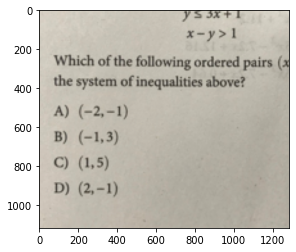

¥YSoxtl
x-y¥>l
Which of the following ordered pairs (x
the system of inequalities above?
A) (=2,=1)
B) (-1,3)
C) (1,5)
D) (2,-1)

['¥YSoxtl', 'x-y¥', '>', 'l', 'Which', 'of', 'the', 'following', 'ordered', 'pairs', '(', 'x', 'the', 'system', 'of', 'inequalities', 'above', '?', 'A', ')', '(', '=2', ',', '=1', ')', 'B', ')', '(', '-1,3', ')', 'C', ')', '(', '1,5', ')', 'D', ')', '(', '2', ',', '-1', ')']
['¥ysoxtl', 'x', 'y¥', 'l', 'which', 'of', 'the', 'following', 'ordered', 'pairs', 'x', 'the', 'system', 'of', 'inequalities', 'above', 'a', '2', '1', 'b', '1', '3', 'c', '1', '5', 'd', '2', '1', '\x0c']
/content/drive/My Drive/TEST_OCR1/test4.jpg


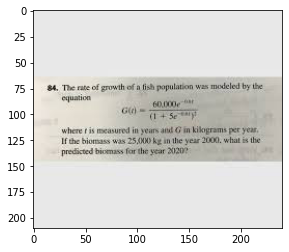

 

[]
['\x0c']
/content/drive/My Drive/TEST_OCR1/test5.jpg


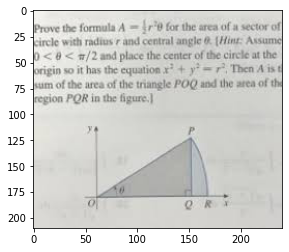

Prove the formula A — {78 forthe area of a sector of
circle with radi rand central ange (Hint: Assume
0 < 8 < /2and place the cemer ofthe circle a the
crigin soit has the equation x* + y* = 7°, Then A ist
cam ofthe area ofthe triangle POQ and the area of th
region POR in the figure.)

>         P

ore

['Prove', 'the', 'formula', 'A', '—', '{', '78', 'forthe', 'area', 'of', 'a', 'sector', 'of', 'circle', 'with', 'radi', 'rand', 'central', 'ange', '(', 'Hint', ':', 'Assume', '0', '<', '8', '<', '/2and', 'place', 'the', 'cemer', 'ofthe', 'circle', 'a', 'the', 'crigin', 'soit', 'has', 'the', 'equation', 'x*', '+', 'y*', '=', '7°', ',', 'Then', 'A', 'ist', 'cam', 'ofthe', 'area', 'ofthe', 'triangle', 'POQ', 'and', 'the', 'area', 'of', 'th', 'region', 'POR', 'in', 'the', 'figure', '.', ')', '>', 'P', 'ore']
['prove', 'the', 'formula', 'a', '—', '78', 'forthe', 'area', 'of', 'a', 'sector', 'of', 'circle', 'with', 'radi', 'rand', 'central', 'ange', 'hint', 'assume', '0', '8', '2and', 'place'

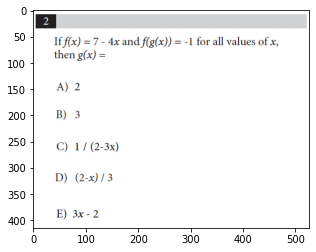

If f(x) =7 - 4x and f(g(x)) = -1 for all values of x,
then g(x) =

A) 2

B) 3

C) 1/ (2-3x)

D) (2-x)/3

E) 3x-2

['If', 'f', '(', 'x', ')', '=7', '-', '4x', 'and', 'f', '(', 'g', '(', 'x', ')', ')', '=', '-1', 'for', 'all', 'values', 'of', 'x', ',', 'then', 'g', '(', 'x', ')', '=', 'A', ')', '2', 'B', ')', '3', 'C', ')', '1/', '(', '2-3x', ')', 'D', ')', '(', '2-x', ')', '/3', 'E', ')', '3x-2']
['if', 'f', 'x', '7', '4x', 'and', 'f', 'g', 'x', '1', 'for', 'all', 'values', 'of', 'x', 'then', 'g', 'x', 'a', '2', 'b', '3', 'c', '1', '2', '3x', 'd', '2', 'x', '3', 'e', '3x', '2', '\x0c']
/content/drive/My Drive/TEST_OCR1/test6.jpg


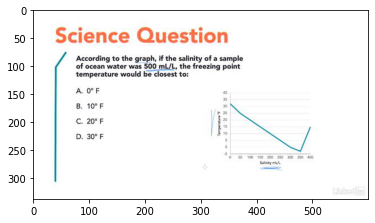

Science Question

According to the graph, if the salinity of a sample
‘of ocean water was 500 ml/L, the freezing point
temperature would be closest to:

AO                                                        1":

8. 10°F
C. 20°F

D. 30°F                   ve

 

['Science', 'Question', 'According', 'to', 'the', 'graph', ',', 'if', 'the', 'salinity', 'of', 'a', 'sample', '‘', 'of', 'ocean', 'water', 'was', '500', 'ml/L', ',', 'the', 'freezing', 'point', 'temperature', 'would', 'be', 'closest', 'to', ':', 'AO', '1', "''", ':', '8', '.', '10°F', 'C.', '20°F', 'D.', '30°F', 've']
['science', 'question', 'according', 'to', 'the', 'graph', 'if', 'the', 'salinity', 'of', 'a', 'sample', '‘of', 'ocean', 'water', 'was', '500', 'ml', 'l', 'the', 'freezing', 'point', 'temperature', 'would', 'be', 'closest', 'to', 'ao', '1', '8', '10°f', 'c', '20°f', 'd', '30°f', 've', '\x0c']
/content/drive/My Drive/TEST_OCR1/test8.png
this is error image
@ v-x'+3

['@', "v-x'+3"]
['v', "x'", '3', '\x0c']
/co

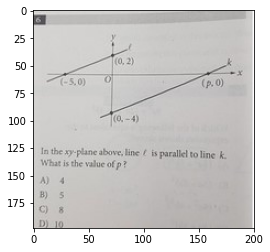

 

Inthe plane above tn pale toting
Wists aa ofp?

n4

Bs

on

eee

['Inthe', 'plane', 'above', 'tn', 'pale', 'toting', 'Wists', 'aa', 'ofp', '?', 'n4', 'Bs', 'on', 'eee']
['inthe', 'plane', 'above', 'tn', 'pale', 'toting', 'wists', 'aa', 'ofp', 'n4', 'bs', 'on', 'eee', '\x0c']
/content/drive/My Drive/TEST_OCR1/test7.png


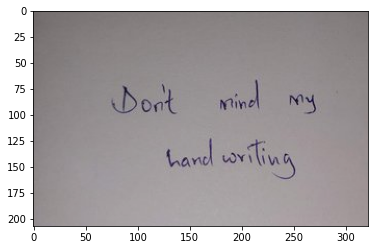

                                                                                                                                                                                                                                                  

et nd oe

ibe oviting

['et', 'nd', 'oe', 'ibe', 'oviting']
['et', 'nd', 'oe', 'ibe', 'oviting', '\x0c']
/content/drive/My Drive/TEST_OCR1/test1.png


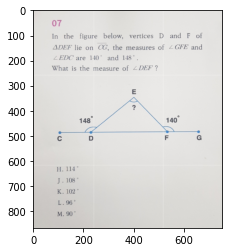

07

In the figure below, vertices D and F of
ADEF \ie on CG, the measures of 4 GFE and
2 EDC are 140° and 148°.

What is the measure of 4 DEF ?

 

 

Oe
Oo
7
a¢

H. 114°
Je 108 *
K. 102°
L. 96°
M. 90°

['07', 'In', 'the', 'figure', 'below', ',', 'vertices', 'D', 'and', 'F', 'of', 'ADEF', '\\ie', 'on', 'CG', ',', 'the', 'measures', 'of', '4', 'GFE', 'and', '2', 'EDC', 'are', '140°', 'and', '148°', '.', 'What', 'is', 'the', 'measure', 'of', '4', 'DEF', '?', 'Oe', 'Oo', '7', 'a¢', 'H.', '114°', 'Je', '108', '*', 'K.', '102°', 'L.', '96°', 'M.', '90°']
['07', 'in', 'the', 'figure', 'below', 'vertices', 'd', 'and', 'f', 'of', 'adef', 'ie', 'on', 'cg', 'the', 'measures', 'of', '4', 'gfe', 'and', '2', 'edc', 'are', '140°', 'and', '148°', 'what', 'is', 'the', 'measure', 'of', '4', 'def', 'oe', 'oo', '7', 'a¢', 'h', '114°', 'je', '108', 'k', '102°', 'l', '96°', 'm', '90°', '\x0c']


In [69]:
# Test keras tokenizer and nltk tokenizer

for i in file_list:
  print(i)
  MyOCR = OCR(img=i) # i == image
  MyOCR.image_preprocess()
  #print(MyOCR.result) # after text preprocess

### tokenizer 비교 분석 

#### **origin : test3** <br>
¥YSoxtl
x-y¥>l
Which of the following ordered pairs (x
the system of inequalities above?
A) (=2,=1)
B) (-1,3)
C) (1,5)
D) (2,-1)

**nltk**: ['¥YSoxtl', 'x-y¥', '>', 'l', 'Which', 'of', 'the', 'following', 'ordered', 'pairs', '(', 'x', 'the', 'system', 'of', 'inequalities', 'above', '?', 'A', ')', '(', '=2', ',', '=1', ')', 'B', ')', '(', '-1,3', ')', 'C', ')', '(', '1,5', ')', 'D', ')', '(', '2', ',', '-1', ')'] <br>
**keras** : ['¥ysoxtl', 'x', 'y¥', 'l', 'which', 'of', 'the', 'following', 'ordered', 'pairs', 'x', 'the', 'system', 'of', 'inequalities', 'above', 'a', '2', '1', 'b', '1', '3', 'c', '1', '5', 'd', '2', '1', '\x0c']
<br><br>

#### **origin : test5** <br>
Prove the formula A — {78 forthe area of a sector of
circle with radi rand central ange (Hint: Assume
0 < 8 < /2and place the cemer ofthe circle a the
crigin soit has the equation x* + y* = 7°, Then A ist
cam ofthe area ofthe triangle POQ and the area of th
region POR in the figure.)

         P

ore


**nltk**: ['Prove', 'the', 'formula', 'A', '—', '{', '78', 'forthe', 'area', 'of', 'a', 'sector', 'of', 'circle', 'with', 'radi', 'rand', 'central', 'ange', '(', 'Hint', ':', 'Assume', '0', '<', '8', '<', '/2and', 'place', 'the', 'cemer', 'ofthe', 'circle', 'a', 'the', 'crigin', 'soit', 'has', 'the', 'equation', 'x*', '+', 'y*', '=', '7°', ',', 'Then', 'A', 'ist', 'cam', 'ofthe', 'area', 'ofthe', 'triangle', 'POQ', 'and', 'the', 'area', 'of', 'th', 'region', 'POR', 'in', 'the', 'figure', '.', ')', '>', 'P', 'ore']
 <br>
**keras** : ['prove', 'the', 'formula', 'a', '—', '78', 'forthe', 'area', 'of', 'a', 'sector', 'of', 'circle', 'with', 'radi', 'rand', 'central', 'ange', 'hint', 'assume', '0', '8', '2and', 'place', 'the', 'cemer', 'ofthe', 'circle', 'a', 'the', 'crigin', 'soit', 'has', 'the', 'equation', 'x', 'y', '7°', 'then', 'a', 'ist', 'cam', 'ofthe', 'area', 'ofthe', 'triangle', 'poq', 'and', 'the', 'area', 'of', 'th', 'region', 'por', 'in', 'the', 'figure', 'p', 'ore', '\x0c']
<br><br>

#### **origin :test6.png** <br>
If f(x) =7 - 4x and f(g(x)) = -1 for all values of x,<br>
then g(x) =

A) 2

B) 3

C) 1/ (2-3x)

D) (2-x)/3

E) 3x-2

**nltk**: ['If', 'f', '(', 'x', ')', '=7', '-', '4x', 'and', 'f', '(', 'g', '(', 'x', ')', ')', '=', '-1', 'for', 'all', 'values', 'of', 'x', ',', 'then', 'g', '(', 'x', ')', '=', 'A', ')', '2', 'B', ')', '3', 'C', ')', '1/', '(', '2-3x', ')', 'D', ')', '(', '2-x', ')', '/3', 'E', ')', '3x-2'] <br>
**keras** : ['if', 'f', 'x', '7', '4x', 'and', 'f', 'g', 'x', '1', 'for', 'all', 'values', 'of', 'x', 'then', 'g', 'x', 'a', '2', 'b', '3', 'c', '1', '2', '3x', 'd', '2', 'x', '3', 'e', '3x', '2', '\x0c']
<br><br>

#### **origin: test6.jpg** <br>
Science Question

According to the graph, if the salinity of a sample<br>
‘of ocean water was 500 ml/L, the freezing point<br>
temperature would be closest to:<br>

AO                                                        1":

8. 10°F<br>
C. 20°F

D. 30°F                   ve


**nltk**: ['Science', 'Question', 'According', 'to', 'the', 'graph', ',', 'if', 'the', 'salinity', 'of', 'a', 'sample', '‘', 'of', 'ocean', 'water', 'was', '500', 'ml/L', ',', 'the', 'freezing', 'point', 'temperature', 'would', 'be', 'closest', 'to', ':', 'AO', '1', "''", ':', '8', '.', '10°F', 'C.', '20°F', 'D.', '30°F', 've'] <br>
**keras** : ['science', 'question', 'according', 'to', 'the', 'graph', 'if', 'the', 'salinity', 'of', 'a', 'sample', '‘of', 'ocean', 'water', 'was', '500', 'ml', 'l', 'the', 'freezing', 'point', 'temperature', 'would', 'be', 'closest', 'to', 'ao', '1', '8', '10°f', 'c', '20°f', 'd', '30°f', 've', '\x0c']
<br><br>

#### **origin : test8** <br>
@ v-x'+3

**nltk**: ['@', "v-x'+3"]<br>
**keras** : ['v', "x'", '3', '\x0c']
<br><br>


#### **origin : test9** <br>
CUAL NA Lele

 

                                                                                                                                                                                                                                                                 

 

 

Q3 In the following passage, one word has been omitted in each line. Write the
missing word in the space provided.
The Chipko movement was stated a              a
‘map Sunderlal Bahugura, Born              »<br>
and brought up In Himalayan region of                   2<br>
sri Garhwal, Sunde Inspired,               o<br>
‘when was still toy, by the                   2<br>
struggle freedom led by Gani, Even           »<br>
after Independence, he continued fight         2<br>
against dhe many erimes socicty                        »<br>

like wntouchatiliy<br>


**nltk**: ['CUAL', 'NA', 'Lele', 'Q3', 'In', 'the', 'following', 'passage', ',', 'one', 'word', 'has', 'been', 'omitted', 'in', 'each', 'line', '.', 'Write', 'the', 'missing', 'word', 'in', 'the', 'space', 'provided', '.', 'The', 'Chipko', 'movement', 'was', 'stated', 'a', 'a', '‘', 'map', 'Sunderlal', 'Bahugura', ',', 'Born', '»', 'and', 'brought', 'up', 'In', 'Himalayan', 'region', 'of', '2', 'sri', 'Garhwal', ',', 'Sunde', 'Inspired', ',', 'o', '‘', 'when', 'was', 'still', 'toy', ',', 'by', 'the', '2', 'struggle', 'freedom', 'led', 'by', 'Gani', ',', 'Even', '»', 'after', 'Independence', ',', 'he', 'continued', 'fight', '2', 'against', 'dhe', 'many', 'erimes', 'socicty', '»', 'like', 'wntouchatiliy'] <br>
**keras** : ['cual', 'na', 'lele', 'q3', 'in', 'the', 'following', 'passage', 'one', 'word', 'has', 'been', 'omitted', 'in', 'each', 'line', 'write', 'the', 'missing', 'word', 'in', 'the', 'space', 'provided', 'the', 'chipko', 'movement', 'was', 'stated', 'a', 'a', '‘map', 'sunderlal', 'bahugura', 'born', '»', 'and', 'brought', 'up', 'in', 'himalayan', 'region', 'of', '2', 'sri', 'garhwal', 'sunde', 'inspired', 'o', '‘when', 'was', 'still', 'toy', 'by', 'the', '2', 'struggle', 'freedom', 'led', 'by', 'gani', 'even', '»', 'after', 'independence', 'he', 'continued', 'fight', '2', 'against', 'dhe', 'many', 'erimes', 'socicty', '»', 'like', 'wntouchatiliy', '\x0c']
<br><br>

#### **origin :test14** <br>
oa Faq age alata) aq<br>
jo a33q sisal steer<br>
                     TIE 2      % TA aa: agen<br>
AN  Seteetect war ster sacs wa) camer: aac TRIG St<br>
Aessifad: ata casifessi areal<br>
seach @e aed: aHRAa: Thal way sad pea<br>
eat      [-Jeqe: adit fever: afi meee:<br>
Deis acteacea: aafuet ted) ferera-ae: aeineeqeey<br>
sata efor: arora: WH FETE AEE ele<br>



**nltk**: ['oa', 'Faq', 'age', 'alata', ')', 'aq', 'jo', 'a33q', 'sisal', 'steer', 'TIE', '2', '%', 'TA', 'aa', ':', 'agen', 'AN', 'Seteetect', 'war', 'ster', 'sacs', 'wa', ')', 'camer', ':', 'aac', 'TRIG', 'St', 'Aessifad', ':', 'ata', 'casifessi', 'areal', 'seach', '@', 'e', 'aed', ':', 'aHRAa', ':', 'Thal', 'way', 'sad', 'pea', 'eat', '[', '-Jeqe', ':', 'adit', 'fever', ':', 'afi', 'meee', ':', 'Deis', 'acteacea', ':', 'aafuet', 'ted', ')', 'ferera-ae', ':', 'aeineeqeey', 'sata', 'efor', ':', 'arora', ':', 'WH', 'FETE', 'AEE', 'ele']<br>
**keras** : ['oa', 'faq', 'age', 'alata', 'aq', 'jo', 'a33q', 'sisal', 'steer', 'tie', '2', 'ta', 'aa', 'agen', 'an', 'seteetect', 'war', 'ster', 'sacs', 'wa', 'camer', 'aac', 'trig', 'st', 'aessifad', 'ata', 'casifessi', 'areal', 'seach', 'e', 'aed', 'ahraa', 'thal', 'way', 'sad', 'pea', 'eat', 'jeqe', 'adit', 'fever', 'afi', 'meee', 'deis', 'acteacea', 'aafuet', 'ted', 'ferera', 'ae', 'aeineeqeey', 'sata', 'efor', 'arora', 'wh', 'fete', 'aee', 'ele', '\x0c']
<br><br>

#### **origin : test2** <br>
Inthe plane above tn pale toting
Wists aa ofp?<br>

n4<br>

Bs<br>

on<br>

eee<br>




**nltk**: ['Inthe', 'plane', 'above', 'tn', 'pale', 'toting', 'Wists', 'aa', 'ofp', '?', 'n4', 'Bs', 'on', 'eee']<br>
**keras** : ['inthe', 'plane', 'above', 'tn', 'pale', 'toting', 'wists', 'aa', 'ofp', 'n4', 'bs', 'on', 'eee', '\x0c']
<br><br>


#### **origin : test7** <br>
et nd oe

ibe oviting




**nltk**: ['et', 'nd', 'oe', 'ibe', 'oviting']<br>
**keras** : ['et', 'nd', 'oe', 'ibe', 'oviting', '\x0c']
<br><br>

#### **origin : test1** <br>
In the figure below, vertices D and F of
ADEF \ie on CG, the measures of 4 GFE and
2 EDC are 140° and 148°.

What is the measure of 4 DEF ?

 

 

Oe
Oo
7
a¢

H. 114°
Je 108 *
K. 102°
L. 96°
M. 90°



**nltk**: ['07', 'In', 'the', 'figure', 'below', ',', 'vertices', 'D', 'and', 'F', 'of', 'ADEF', '\\ie', 'on', 'CG', ',', 'the', 'measures', 'of', '4', 'GFE', 'and', '2', 'EDC', 'are', '140°', 'and', '148°', '.', 'What', 'is', 'the', 'measure', 'of', '4', 'DEF', '?', 'Oe', 'Oo', '7', 'a¢', 'H.', '114°', 'Je', '108', '*', 'K.', '102°', 'L.', '96°', 'M.', '90°']<br>
**keras** : ['07', 'in', 'the', 'figure', 'below', 'vertices', 'd', 'and', 'f', 'of', 'adef', 'ie', 'on', 'cg', 'the', 'measures', 'of', '4', 'gfe', 'and', '2', 'edc', 'are', '140°', 'and', '148°', 'what', 'is', 'the', 'measure', 'of', '4', 'def', 'oe', 'oo', '7', 'a¢', 'h', '114°', 'je', '108', 'k', '102°', 'l', '96°', 'm', '90°', '\x0c']
<br><br>

/content/drive/My Drive/TEST_OCR1/test3.png


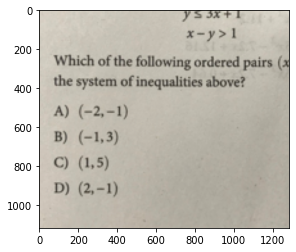

¥YSoxtl
x-y¥>l
Which of the following ordered pairs (x
the system of inequalities above?
A) (=2,=1)
B) (-1,3)
C) (1,5)
D) (2,-1)

['¥YSoxtl', 'x-y¥', '>', 'l', 'Which', 'of', 'the', 'following', 'ordered', 'pairs', '(', 'x', 'the', 'system', 'of', 'inequalities', 'above', '?', 'A', ')', '(', '=2', ',', '=1', ')', 'B', ')', '(', '-1,3', ')', 'C', ')', '(', '1,5', ')', 'D', ')', '(', '2', ',', '-1', ')']
[('¥YSoxtl', 'JJ'), ('x-y¥', 'JJ'), ('>', 'NN'), ('l', 'NN'), ('Which', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('following', 'JJ'), ('ordered', 'JJ'), ('pairs', 'NNS'), ('(', '('), ('x', 'VB'), ('the', 'DT'), ('system', 'NN'), ('of', 'IN'), ('inequalities', 'NNS'), ('above', 'IN'), ('?', '.'), ('A', 'DT'), (')', ')'), ('(', '('), ('=2', 'UH'), (',', ','), ('=1', 'NNP'), (')', ')'), ('B', 'NNP'), (')', ')'), ('(', '('), ('-1,3', '$'), (')', ')'), ('C', 'NNP'), (')', ')'), ('(', '('), ('1,5', 'CD'), (')', ')'), ('D', 'NNP'), (')', ')'), ('(', '('), ('2', 'CD'), (',', ','), ('-1', 'NN'), (')

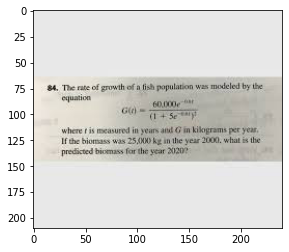

 

[]
[]
[]
[('\x0c', 'NN')]
/content/drive/My Drive/TEST_OCR1/test5.jpg


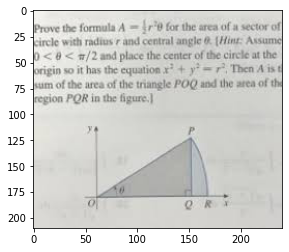

Prove the formula A — {78 forthe area of a sector of
circle with radi rand central ange (Hint: Assume
0 < 8 < /2and place the cemer ofthe circle a the
crigin soit has the equation x* + y* = 7°, Then A ist
cam ofthe area ofthe triangle POQ and the area of th
region POR in the figure.)

>         P

ore

['Prove', 'the', 'formula', 'A', '—', '{', '78', 'forthe', 'area', 'of', 'a', 'sector', 'of', 'circle', 'with', 'radi', 'rand', 'central', 'ange', '(', 'Hint', ':', 'Assume', '0', '<', '8', '<', '/2and', 'place', 'the', 'cemer', 'ofthe', 'circle', 'a', 'the', 'crigin', 'soit', 'has', 'the', 'equation', 'x*', '+', 'y*', '=', '7°', ',', 'Then', 'A', 'ist', 'cam', 'ofthe', 'area', 'ofthe', 'triangle', 'POQ', 'and', 'the', 'area', 'of', 'th', 'region', 'POR', 'in', 'the', 'figure', '.', ')', '>', 'P', 'ore']
[('Prove', 'VB'), ('the', 'DT'), ('formula', 'NN'), ('A', 'NNP'), ('—', 'NNP'), ('{', '('), ('78', 'CD'), ('forthe', 'JJ'), ('area', 'NN'), ('of', 'IN'), ('a', 'DT'), ('sector', 'NN'), 

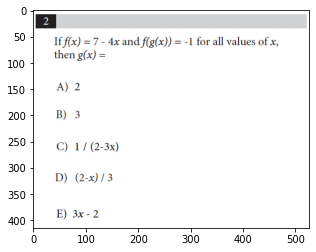

If f(x) =7 - 4x and f(g(x)) = -1 for all values of x,
then g(x) =

A) 2

B) 3

C) 1/ (2-3x)

D) (2-x)/3

E) 3x-2

['If', 'f', '(', 'x', ')', '=7', '-', '4x', 'and', 'f', '(', 'g', '(', 'x', ')', ')', '=', '-1', 'for', 'all', 'values', 'of', 'x', ',', 'then', 'g', '(', 'x', ')', '=', 'A', ')', '2', 'B', ')', '3', 'C', ')', '1/', '(', '2-3x', ')', 'D', ')', '(', '2-x', ')', '/3', 'E', ')', '3x-2']
[('If', 'IN'), ('f', 'VBN'), ('(', '('), ('x', 'NN'), (')', ')'), ('=7', 'VBZ'), ('-', ':'), ('4x', 'CD'), ('and', 'CC'), ('f', 'NN'), ('(', '('), ('g', 'NN'), ('(', '('), ('x', 'NNP'), (')', ')'), (')', ')'), ('=', 'VBP'), ('-1', 'NN'), ('for', 'IN'), ('all', 'DT'), ('values', 'NNS'), ('of', 'IN'), ('x', 'NN'), (',', ','), ('then', 'RB'), ('g', 'NN'), ('(', '('), ('x', 'NNP'), (')', ')'), ('=', 'VBP'), ('A', 'DT'), (')', ')'), ('2', 'CD'), ('B', 'NNP'), (')', ')'), ('3', 'CD'), ('C', 'NNP'), (')', ')'), ('1/', 'CD'), ('(', '('), ('2-3x', 'JJ'), (')', ')'), ('D', 'NNP'), (')', ')'), ('(', '(')

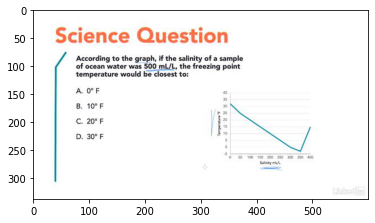

Science Question

According to the graph, if the salinity of a sample
‘of ocean water was 500 ml/L, the freezing point
temperature would be closest to:

AO                                                        1":

8. 10°F
C. 20°F

D. 30°F                   ve

 

['Science', 'Question', 'According', 'to', 'the', 'graph', ',', 'if', 'the', 'salinity', 'of', 'a', 'sample', '‘', 'of', 'ocean', 'water', 'was', '500', 'ml/L', ',', 'the', 'freezing', 'point', 'temperature', 'would', 'be', 'closest', 'to', ':', 'AO', '1', "''", ':', '8', '.', '10°F', 'C.', '20°F', 'D.', '30°F', 've']
[('Science', 'NN'), ('Question', 'NNP'), ('According', 'VBG'), ('to', 'TO'), ('the', 'DT'), ('graph', 'NN'), (',', ','), ('if', 'IN'), ('the', 'DT'), ('salinity', 'NN'), ('of', 'IN'), ('a', 'DT'), ('sample', 'JJ'), ('‘', 'NN'), ('of', 'IN'), ('ocean', 'JJ'), ('water', 'NN'), ('was', 'VBD'), ('500', 'CD'), ('ml/L', 'NN'), (',', ','), ('the', 'DT'), ('freezing', 'NN'), ('point', 'NN'), ('temperature', 'NN'), ('w

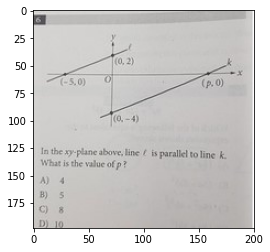

 

Inthe plane above tn pale toting
Wists aa ofp?

n4

Bs

on

eee

['Inthe', 'plane', 'above', 'tn', 'pale', 'toting', 'Wists', 'aa', 'ofp', '?', 'n4', 'Bs', 'on', 'eee']
[('Inthe', 'NNP'), ('plane', 'NN'), ('above', 'IN'), ('tn', 'NN'), ('pale', 'NN'), ('toting', 'VBG'), ('Wists', 'NNS'), ('aa', 'VBP'), ('ofp', 'RB'), ('?', '.'), ('n4', 'JJ'), ('Bs', 'NNP'), ('on', 'IN'), ('eee', 'NN')]
['inthe', 'plane', 'above', 'tn', 'pale', 'toting', 'wists', 'aa', 'ofp', 'n4', 'bs', 'on', 'eee', '\x0c']
[('inthe', 'JJ'), ('plane', 'NN'), ('above', 'IN'), ('tn', 'NN'), ('pale', 'NN'), ('toting', 'VBG'), ('wists', 'NNS'), ('aa', 'VBP'), ('ofp', 'JJ'), ('n4', 'JJ'), ('bs', 'NN'), ('on', 'IN'), ('eee', 'NN'), ('\x0c', 'NN')]
/content/drive/My Drive/TEST_OCR1/test7.png


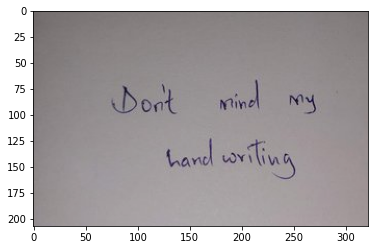

                                                                                                                                                                                                                                                  

et nd oe

ibe oviting

['et', 'nd', 'oe', 'ibe', 'oviting']
[('et', 'RB'), ('nd', 'JJ'), ('oe', 'NN'), ('ibe', 'NN'), ('oviting', 'VBG')]
['et', 'nd', 'oe', 'ibe', 'oviting', '\x0c']
[('et', 'RB'), ('nd', 'JJ'), ('oe', 'NN'), ('ibe', 'NN'), ('oviting', 'VBG'), ('\x0c', 'NN')]
/content/drive/My Drive/TEST_OCR1/test1.png


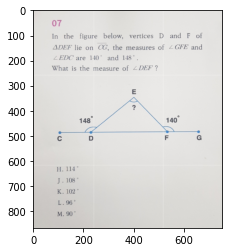

07

In the figure below, vertices D and F of
ADEF \ie on CG, the measures of 4 GFE and
2 EDC are 140° and 148°.

What is the measure of 4 DEF ?

 

 

Oe
Oo
7
a¢

H. 114°
Je 108 *
K. 102°
L. 96°
M. 90°

['07', 'In', 'the', 'figure', 'below', ',', 'vertices', 'D', 'and', 'F', 'of', 'ADEF', '\\ie', 'on', 'CG', ',', 'the', 'measures', 'of', '4', 'GFE', 'and', '2', 'EDC', 'are', '140°', 'and', '148°', '.', 'What', 'is', 'the', 'measure', 'of', '4', 'DEF', '?', 'Oe', 'Oo', '7', 'a¢', 'H.', '114°', 'Je', '108', '*', 'K.', '102°', 'L.', '96°', 'M.', '90°']
[('07', 'CD'), ('In', 'IN'), ('the', 'DT'), ('figure', 'NN'), ('below', 'IN'), (',', ','), ('vertices', 'NNS'), ('D', 'NNP'), ('and', 'CC'), ('F', 'NNP'), ('of', 'IN'), ('ADEF', 'NNP'), ('\\ie', 'NNP'), ('on', 'IN'), ('CG', 'NNP'), (',', ','), ('the', 'DT'), ('measures', 'NNS'), ('of', 'IN'), ('4', 'CD'), ('GFE', 'NNP'), ('and', 'CC'), ('2', 'CD'), ('EDC', 'NNP'), ('are', 'VBP'), ('140°', 'CD'), ('and', 'CC'), ('148°', 'CD'), ('.', '.'), (

In [89]:
# Test keras tokenizer and nltk tokenizer

# add pos(품사태깅)

for i in file_list:
  print(i)
  MyOCR = OCR(img=i) # i == image
  MyOCR.image_preprocess()
  #print(MyOCR.result) # after text preprocess

/content/drive/My Drive/TEST_OCR1/test3.png


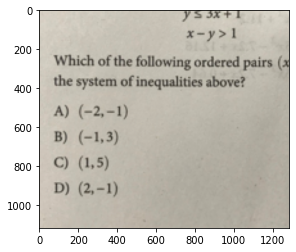

¥YSoxtl
x-y¥>l
Which of the following ordered pairs (x
the system of inequalities above?
A) (=2,=1)
B) (-1,3)
C) (1,5)
D) (2,-1)

result text:  ['¥ysoxtl', 'x', 'y¥', 'l', 'which', 'of', 'the', 'following', 'ordered', 'pairs', 'x', 'the', 'system', 'of', 'inequalities', 'above', 'a', '2', '1', 'b', '1', '3', 'c', '1', '5', 'd', '2', '1']
/content/drive/My Drive/TEST_OCR1/test4.jpg


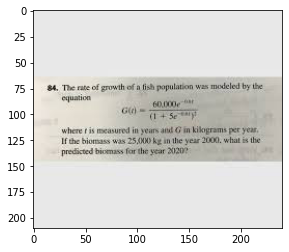

 

This is invaild photo

/content/drive/My Drive/TEST_OCR1/test5.jpg


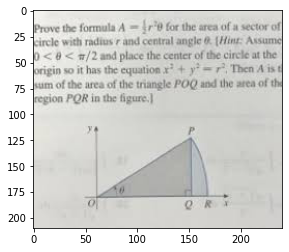

Prove the formula A — {78 forthe area of a sector of
circle with radi rand central ange (Hint: Assume
0 < 8 < /2and place the cemer ofthe circle a the
crigin soit has the equation x* + y* = 7°, Then A ist
cam ofthe area ofthe triangle POQ and the area of th
region POR in the figure.)

>         P

ore

result text:  ['prove', 'the', 'formula', 'a', '—', '78', 'forthe', 'area', 'of', 'a', 'sector', 'of', 'circle', 'with', 'radi', 'rand', 'central', 'ange', 'hint', 'assume', '0', '8', '2and', 'place', 'the', 'cemer', 'ofthe', 'circle', 'a', 'the', 'crigin', 'soit', 'has', 'the', 'equation', 'x', 'y', '7°', 'then', 'a', 'ist', 'cam', 'ofthe', 'area', 'ofthe', 'triangle', 'poq', 'and', 'the', 'area', 'of', 'th', 'region', 'por', 'in', 'the', 'figure', 'p', 'ore']
/content/drive/My Drive/TEST_OCR1/test6.png


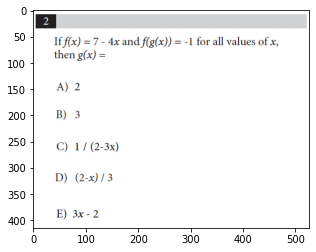

If f(x) =7 - 4x and f(g(x)) = -1 for all values of x,
then g(x) =

A) 2

B) 3

C) 1/ (2-3x)

D) (2-x)/3

E) 3x-2

result text:  ['if', 'f', 'x', '7', '4x', 'and', 'f', 'g', 'x', '1', 'for', 'all', 'values', 'of', 'x', 'then', 'g', 'x', 'a', '2', 'b', '3', 'c', '1', '2', '3x', 'd', '2', 'x', '3', 'e', '3x', '2']
/content/drive/My Drive/TEST_OCR1/test6.jpg


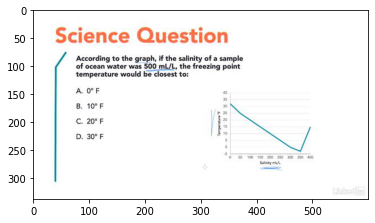

Science Question

According to the graph, if the salinity of a sample
‘of ocean water was 500 ml/L, the freezing point
temperature would be closest to:

AO                                                        1":

8. 10°F
C. 20°F

D. 30°F                   ve

 

result text:  ['science', 'question', 'according', 'to', 'the', 'graph', 'if', 'the', 'salinity', 'of', 'a', 'sample', '‘of', 'ocean', 'water', 'was', '500', 'ml', 'l', 'the', 'freezing', 'point', 'temperature', 'would', 'be', 'closest', 'to', 'ao', '1', '8', '10°f', 'c', '20°f', 'd', '30°f', 've']
/content/drive/My Drive/TEST_OCR1/test8.png
this is error image
@ v-x'+3

result text:  ['v', "x'", '3']
/content/drive/My Drive/TEST_OCR1/test9.png
this is error image
CUAL NA Lele

 

                                                                                                                                                                                                                                                      

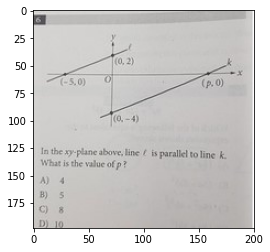

 

Inthe plane above tn pale toting
Wists aa ofp?

n4

Bs

on

eee

result text:  ['inthe', 'plane', 'above', 'tn', 'pale', 'toting', 'wists', 'aa', 'ofp', 'n4', 'bs', 'on', 'eee']
/content/drive/My Drive/TEST_OCR1/test7.png


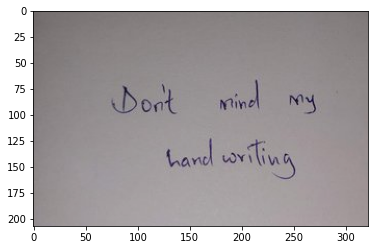

                                                                                                                                                                                                                                                  

et nd oe

ibe oviting

result text:  ['et', 'nd', 'oe', 'ibe', 'oviting']
/content/drive/My Drive/TEST_OCR1/test1.png


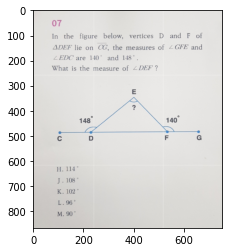

07

In the figure below, vertices D and F of
ADEF \ie on CG, the measures of 4 GFE and
2 EDC are 140° and 148°.

What is the measure of 4 DEF ?

 

 

Oe
Oo
7
a¢

H. 114°
Je 108 *
K. 102°
L. 96°
M. 90°

result text:  ['07', 'in', 'the', 'figure', 'below', 'vertices', 'd', 'and', 'f', 'of', 'adef', 'ie', 'on', 'cg', 'the', 'measures', 'of', '4', 'gfe', 'and', '2', 'edc', 'are', '140°', 'and', '148°', 'what', 'is', 'the', 'measure', 'of', '4', 'def', 'oe', 'oo', '7', 'a¢', 'h', '114°', 'je', '108', 'k', '102°', 'l', '96°', 'm', '90°']


In [97]:
# Test keras tokenizer and nltk tokenizer

for i in file_list:
  print(i)
  MyOCR = OCR(img=i) # i == image
  MyOCR.image_preprocess()